<a href="https://colab.research.google.com/github/kuds/rl-car-racing/blob/main/%5BCar%20Racing%5D%20Proximal%20Policy%20Optimization%20(PPO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proximal Policy Optimitization (PPO)

In [1]:
!pip install swig

In [2]:
!pip install stable_baselines3 gymnasium[box2d]

In [3]:
import gymnasium
from gymnasium.wrappers import RecordVideo
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.atari_wrappers import WarpFrame
from stable_baselines3.common.vec_env import VecFrameStack, VecVideoRecorder
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecTransposeImage
import os
import torch
import numpy
import platform
import stable_baselines3
import matplotlib
import matplotlib.pyplot
from platform import python_version
from importlib.metadata import version

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [4]:
print(f"Python Version: {platform.python_version()}")
print(f"Torch Version: {version('torch')}")
print(f"Is Cuda Available: {torch.cuda.is_available()}")
print(f"Cuda Version: {torch.version.cuda}")
print(f"Gymnasium Version: {version('gymnasium')}")
print(f"Numpy Version: {version('numpy')}")
print(f"Scipy Version: {version('scipy')}")
print(f"Swig Version: {version('swig')}")
print(f"Stable Baselines3 Version: {version('stable_baselines3')}")
print(f"IPython Version: {version('ipython')}")

Python Version: 3.12.11
Torch Version: 2.8.0+cu126
Is Cuda Available: True
Cuda Version: 12.6
Gymnasium Version: 1.2.1
Numpy Version: 2.0.2
Scipy Version: 1.16.2
Swig Version: 4.3.1.post0
Stable Baselines3 Version: 2.7.0
IPython Version: 7.34.0


In [5]:
env = gymnasium.make('CarRacing-v3')
print("Observation Space Size: ", env.observation_space.shape)
print("Action Space Size: ", env.action_space.shape)
env.close()

<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type swigvarlink has no __module__ attribute
/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/

Observation Space Size:  (96, 96, 3)
Action Space Size:  (3,)


In [6]:
env_str = "CarRacing-v3"
log_dir = "./logs/{}".format(env_str)
name_prefix = "car_racing"
gray_scale = True

# If gray_scale True, convert obs to gray scale 84 x 84 image
wrapper_class = WarpFrame if gray_scale else None

In [7]:
# Create Training CarRacing environment
env = make_vec_env(env_str, n_envs=1, wrapper_class=wrapper_class)
env = VecFrameStack(env, n_stack=4)
env = VecTransposeImage(env)

# Create Evaluation CarRacing environment
env_val = make_vec_env(env_str, n_envs=1, wrapper_class=wrapper_class)
env_val = VecFrameStack(env_val, n_stack=4)
env_val = VecTransposeImage(env_val)

# Create Evaluation Callback
# eval_freq - can cause learning instability if set to low
eval_callback = EvalCallback(env_val,
                             best_model_save_path=log_dir,
                             log_path=log_dir,
                             eval_freq=25_000,
                             render=False,
                             n_eval_episodes=20)

# Initialize PPO
# ent_coef - encourages exploration of other actins
model = PPO('CnnPolicy', env, verbose=0, ent_coef=0.005)

# Train the model
model.learn(total_timesteps=1_000_000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "final_model"))

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=20)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: 
datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects 
to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)

Output()

/usr/local/lib/python3.12/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

Eval num_timesteps=25000, episode_reward=-24.34 +/- 31.64

Episode length: 365.25 +/- 317.48

New best mean reward!

Eval num_timesteps=50000, episode_reward=36.48 +/- 62.37

Episode length: 806.70 +/- 334.81

New best mean reward!

Eval num_timesteps=75000, episode_reward=46.54 +/- 95.84

Episode length: 824.55 +/- 306.32

New best mean reward!

Eval num_timesteps=100000, episode_reward=131.61 +/- 94.59

Episode length: 838.25 +/- 323.51

New best mean reward!

Eval num_timesteps=125000, episode_reward=175.98 +/- 99.40

Episode length: 964.90 +/- 153.00

New best mean reward!

Eval num_timesteps=150000, episode_reward=98.92 +/- 59.07

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=175000, episode_reward=12.46 +/- 20.68

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=200000, episode_reward=64.81 +/- 99.93

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=225000, episode_reward=105.30 +/- 98.66

Episode length: 959.90 +/- 174.79

Eval num_timesteps=250000, episode_reward=153.16 +/- 120.67

Episode length: 985.45 +/- 63.42

Eval num_timesteps=275000, episode_reward=226.03 +/- 228.05

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=300000, episode_reward=440.48 +/- 237.87

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=325000, episode_reward=614.20 +/- 201.59

Episode length: 974.60 +/- 79.71

New best mean reward!

Eval num_timesteps=350000, episode_reward=550.78 +/- 234.93

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=375000, episode_reward=519.64 +/- 254.17

Episode length: 983.80 +/- 70.61

Eval num_timesteps=400000, episode_reward=490.06 +/- 264.39

Episode length: 921.70 +/- 234.91

Eval num_timesteps=425000, episode_reward=568.06 +/- 271.46

Episode length: 931.00 +/- 200.05

Eval num_timesteps=450000, episode_reward=326.01 +/- 125.60

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=475000, episode_reward=683.71 +/- 230.30

Episode length: 979.50 +/- 62.60

New best mean reward!

Eval num_timesteps=500000, episode_reward=725.52 +/- 212.21

Episode length: 988.55 +/- 49.91

New best mean reward!

Eval num_timesteps=525000, episode_reward=586.54 +/- 360.02

Episode length: 918.55 +/- 141.29

Eval num_timesteps=550000, episode_reward=320.07 +/- 211.61

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=575000, episode_reward=251.57 +/- 155.14

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=600000, episode_reward=465.55 +/- 162.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=625000, episode_reward=686.70 +/- 182.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=650000, episode_reward=555.46 +/- 278.89

Episode length: 939.80 +/- 186.81

Eval num_timesteps=675000, episode_reward=393.53 +/- 239.78

Episode length: 922.25 +/- 233.25

Eval num_timesteps=700000, episode_reward=370.52 +/- 189.47

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=725000, episode_reward=687.53 +/- 205.46

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=750000, episode_reward=624.66 +/- 289.65

Episode length: 943.35 +/- 127.35

Eval num_timesteps=775000, episode_reward=776.92 +/- 140.15

Episode length: 965.50 +/- 63.84

New best mean reward!

Eval num_timesteps=800000, episode_reward=805.39 +/- 136.56

Episode length: 994.45 +/- 16.92

New best mean reward!

Eval num_timesteps=825000, episode_reward=869.84 +/- 152.31

Episode length: 845.30 +/- 151.25

New best mean reward!

Eval num_timesteps=850000, episode_reward=845.17 +/- 48.23

Episode length: 983.35 +/- 60.60

Eval num_timesteps=875000, episode_reward=842.92 +/- 44.86

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=900000, episode_reward=851.85 +/- 75.29

Episode length: 986.05 +/- 43.25

Eval num_timesteps=925000, episode_reward=790.42 +/- 77.81

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=950000, episode_reward=841.97 +/- 30.17

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=975000, episode_reward=846.15 +/- 97.82

Episode length: 952.65 +/- 81.03

Eval num_timesteps=1000000, episode_reward=856.57 +/- 19.79

Episode length: 1000.00 +/- 0.00

Mean reward: 843.43 +/- 67.14


In [8]:
# Create Evaluation CarRacing environment
env = make_vec_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)
env = VecFrameStack(env, n_stack=4)
env = VecTransposeImage(env)

# Load the best model
best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=20)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing Lunar Lander
best_model_file_name = "best_model_{}".format(name_prefix)
env = VecVideoRecorder(env,
                       log_dir,
                       video_length=10_000,
                       record_video_trigger=lambda x: x == 0,
                       name_prefix=best_model_file_name)

obs = env.reset()
for _ in range(10000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
        break

env.close()

Best Model - Mean reward: 876.97 +/- 51.19


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"


Moviepy - Building video /content/logs/CarRacing-v3/best_model_car_racing-step-0-to-step-10000.mp4.
Moviepy - Writing video /content/logs/CarRacing-v3/best_model_car_racing-step-0-to-step-10000.mp4



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Moviepy - Done !
Moviepy - video ready /content/logs/CarRacing-v3/best_model_car_racing-step-0-to-step-10000.mp4


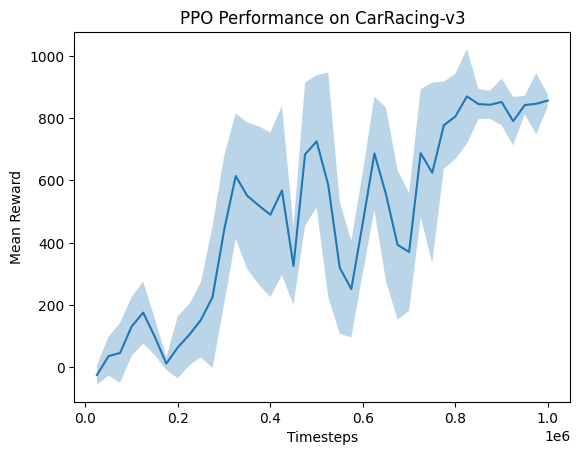

In [9]:
# Load the evaluations.npz file
data = numpy.load(os.path.join(log_dir, "evaluations.npz"))

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title(f"PPO Performance on {env_str}")
matplotlib.pyplot.show()